In [ ]:
import random
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb

import shap
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_invariants = pd.read_excel('../invariants_generation/invariants_plusminus1.xlsx')

In [ ]:
df_invariants

,weight_edges_vertices,weight_edges,average_degree_connectivity,degree_assortativity,local_efficiency,degree_centrality,average_neighbor_degree,global_efficiency,estrada_index,wiener_index,pagerank,path,label
0,520.593424,149.687664,5.015425,0.440103,0.671236,0.002265,5.994625,0.064829,66820.374058,104990124.0,0.000326,./cells/1_1_0_1058.jpg,1
1,517.060547,147.979318,5.076504,0.443647,0.670064,0.002276,6.023955,0.064939,67620.468611,104899012.0,0.000326,./cells/1_1_0_1060.jpg,1
2,518.279948,149.259961,5.045749,0.432262,0.671177,0.002261,5.983364,0.064864,66294.535470,104950594.0,0.000326,./cells/1_1_0_1629.jpg,1
3,522.733724,149.854237,4.358591,0.438589,0.670367,0.002272,6.011848,0.064915,67210.430387,104914024.0,0.000326,./cells/1_1_0_1679.jpg,1
4,519.661458,149.419693,4.697130,0.429179,0.671269,0.002265,5.994488,0.064861,66667.620481,104960960.0,0.000326,./cells/1_1_0_1784.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,562.224609,158.106371,5.440226,0.445336,0.665721,0.002316,6.136304,0.065055,71389.158287,104843804.0,0.000326,./cells/108_0_0_9420.jpg,0
3227,575.970052,162.611892,5.300427,0.443985,0.666581,0.002307,6.110043,0.065019,70454.983447,104862192.0,0.000326,./cells/108_0_0_954.jpg,0
3228,561.453125,158.411462,5.548602,0.432528,0.666532,0.002308,6.116067,0.065028,70666.850128,104858002.0,0.000326,./cells/108_0_0_9558.jpg,0
3229,569.782878,160.746901,5.409888,0.462416,0.666554,0.002308,6.116075,0.065008,70692.774346,104872746.0,0.000326,./cells/108_0_0_9688.jpg,0


In [ ]:
df = df_invariants.copy()

In [ ]:
label = df.label

In [ ]:
lst = ['path_', 'label']
df = df.drop(lst, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=42)

In [ ]:
nams = list(X_test.columns)

In [ ]:
def process_graph_attributes(train, test):

	ss = StandardScaler()
	trainCols = ss.fit_transform(train)
	testCols = ss.transform(test)

	return trainCols, testCols

In [ ]:
X_train, X_test = process_graph_attributes(X_train, X_test)

In [ ]:
clf = xgb.XGBClassifier()

clf.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=5, eval_metric=["error", "logloss","auc"])

[0]	validation_0-error:0.06502	validation_0-logloss:0.48290	validation_0-auc:0.98147	validation_1-error:0.08247	validation_1-logloss:0.49556	validation_1-auc:0.95845
[1]	validation_0-error:0.05927	validation_0-logloss:0.36913	validation_0-auc:0.98607	validation_1-error:0.07938	validation_1-logloss:0.39016	validation_1-auc:0.96629
[2]	validation_0-error:0.05750	validation_0-logloss:0.29434	validation_0-auc:0.98869	validation_1-error:0.07835	validation_1-logloss:0.32571	validation_1-auc:0.96821
[3]	validation_0-error:0.05573	validation_0-logloss:0.24561	validation_0-auc:0.98925	validation_1-error:0.07629	validation_1-logloss:0.28324	validation_1-auc:0.97061
[4]	validation_0-error:0.05175	validation_0-logloss:0.20781	validation_0-auc:0.99124	validation_1-error:0.08041	validation_1-logloss:0.25425	validation_1-auc:0.97146
[5]	validation_0-error:0.04998	validation_0-logloss:0.18260	validation_0-auc:0.99164	validation_1-error:0.07113	validation_1-logloss:0.23119	validation_1-auc:0.97317
[6]	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
clf.get_booster().feature_names = nams

In [ ]:
df_table =pd.DataFrame(clf.get_booster().get_score().items(), columns=['feature','weight_importance'])

In [ ]:
df_table

,feature,weight_importance
0,weight_edges_vertices,74.0
1,weight_edges,64.0
2,average_degree_connectivity,70.0
3,degree_assortativity,80.0
4,local_efficiency,91.0
5,degree_centrality,10.0
6,average_neighbor_degree,19.0
7,global_efficiency,64.0
8,estrada_index,69.0


In [ ]:
nams__ = ['wiener_index', 'pagerank']

for i in nams__:
    df_table = df_table.append({'feature':i}, ignore_index=True)

df_table = df_table.fillna(0)

In [ ]:
def ks_test(df, col, label, sample_size, pvalue):
    group_1 = df[df[label]==1][col]
    group_0 = df[df[label]==0][col]

    group_0 = group_0.values.tolist()
    group_0 = random.sample(group_0, sample_size)
    group_1 = group_1.values.tolist()
    group_1 = random.sample(group_1, sample_size)

    _, pnorm = stats.ks_2samp(group_1, group_0)

    print("stat",_)
    print('p value',pnorm)

    if pnorm <pvalue:
        print("we reject null hypothesis")
    else:
        print("we accept null hypothesis")
    return _

In [ ]:
ks_stat = []
for i in nams:
    ks_stat.append(ks_test(df_invariants, i, "label", 1400, 0.05))

stat 0.61
p value 3.127908951256365e-243
we reject null hypothesis
stat 0.56
p value 1.7050857125037966e-202
we reject null hypothesis
stat 0.5478571428571428
p value 2.7681854096586515e-193
we reject null hypothesis
stat 0.21428571428571427
p value 1.4949085358930817e-28
we reject null hypothesis
stat 0.6657142857142857
p value 2.336688751984429e-294
we reject null hypothesis
stat 0.6578571428571428
p value 9.330420842479536e-287
we reject null hypothesis
stat 0.65
p value 2.7476620192899902e-279
we reject null hypothesis
stat 0.575
p value 3.112616874519951e-214
we reject null hypothesis
stat 0.6428571428571429
p value 1.3069157318662475e-272
we reject null hypothesis
stat 0.5307142857142857
p value 1.0241971069915163e-180
we reject null hypothesis
stat 0.0
p value 1.0
we accept null hypothesis


In [ ]:
df_table['ks_stat'] = ks_stat

In [ ]:
explainer = shap.Explainer(clf, feature_names=nams)
shap_values = explainer(X_test)

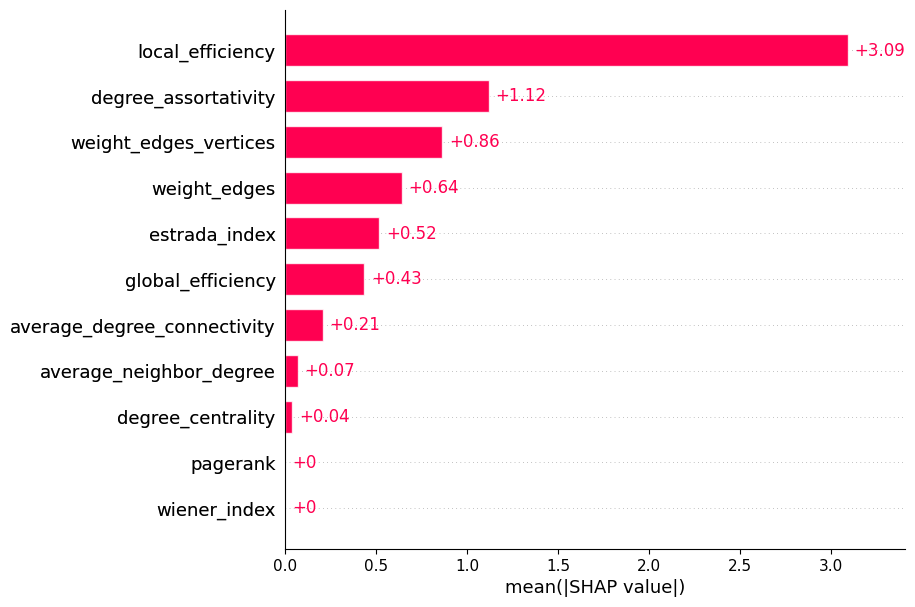

In [ ]:
shap.plots.bar(shap_values, max_display=len(nams))

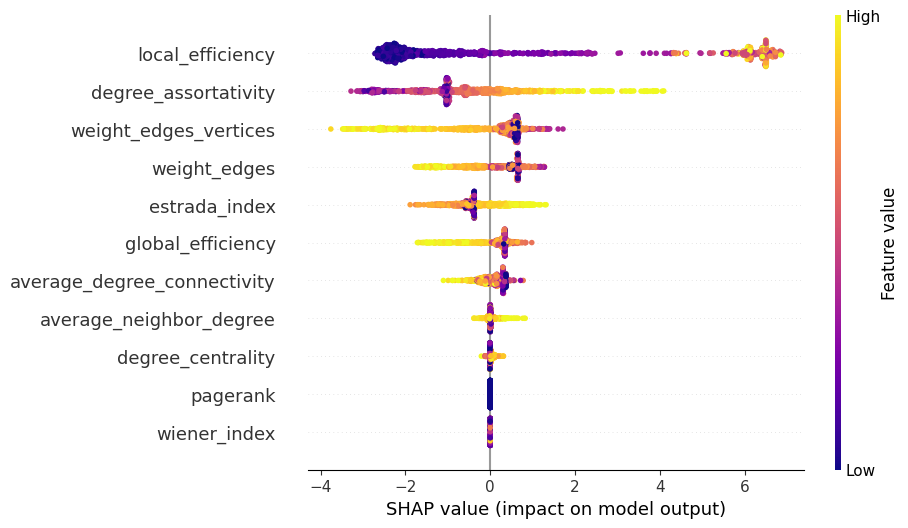

In [ ]:
shap.plots.beeswarm(shap_values, max_display=len(nams),color=plt.get_cmap("plasma"))

In [ ]:
shap_val = abs(shap_values.values).mean(axis=0)
shap_val

array([0.86254126, 0.6395374 , 0.20658687, 1.118739  , 3.09045   ,
       0.03812112, 0.06739908, 0.43392745, 0.51683056, 0.        ,
       0.        ], dtype=float32)

In [ ]:
df_table['mean_shap_values'] = shap_val

In [ ]:
df_table

,feature,weight_importance,ks_stat,mean_shap_values
0,weight_edges_vertices,74.0,0.610000,0.862541
1,weight_edges,64.0,0.560000,0.639537
2,average_degree_connectivity,70.0,0.547857,0.206587
3,degree_assortativity,80.0,0.214286,1.118739
4,local_efficiency,91.0,0.665714,3.090450
5,degree_centrality,10.0,0.657857,0.038121
6,average_neighbor_degree,19.0,0.650000,0.067399
7,global_efficiency,64.0,0.575000,0.433927
8,estrada_index,69.0,0.642857,0.516831
9,wiener_index,0.0,0.530714,0.000000


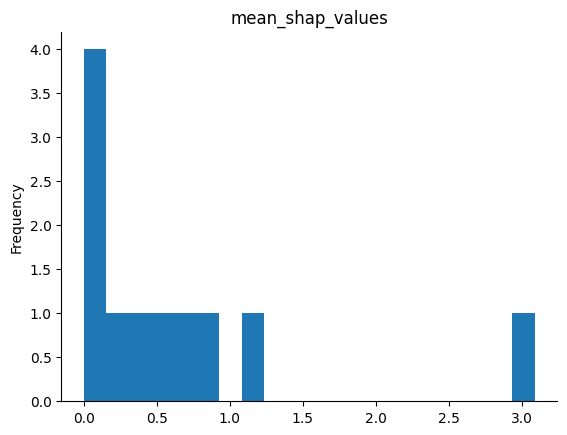

In [ ]:
df_table['mean_shap_values'].plot(kind='hist', bins=20, title='mean_shap_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

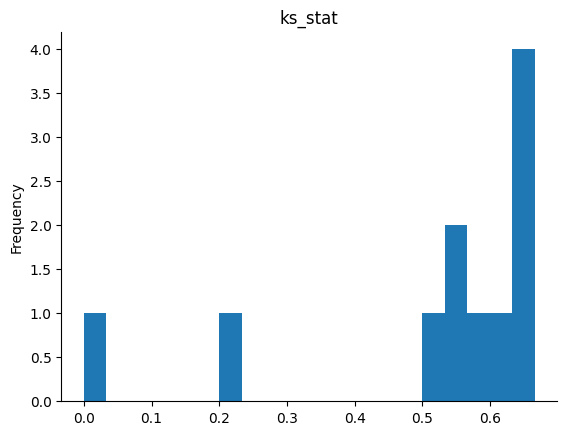

In [ ]:
df_table['ks_stat'].plot(kind='hist', bins=20, title='ks_stat')
plt.gca().spines[['top', 'right',]].set_visible(False)

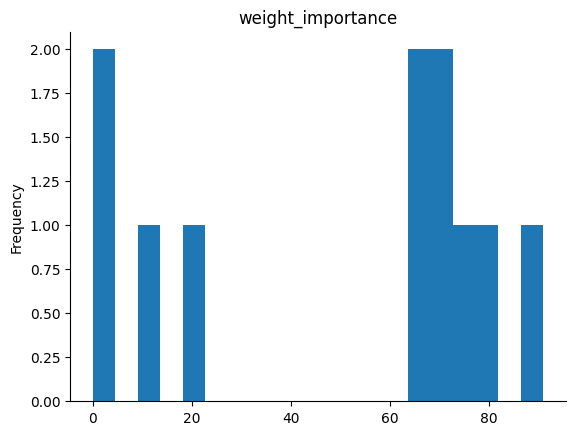

In [ ]:
df_table['weight_importance'].plot(kind='hist', bins=20, title='weight_importance')
plt.gca().spines[['top', 'right',]].set_visible(False)